# Overview:

#### Source : 
https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews/


#### Context
This is a Women’s Clothing E-Commerce dataset revolving around the reviews written by customers. Its nine supportive features offer a great environment to parse out the text through its multiple dimensions. Because this is real commercial data, it has been anonymized, and references to the company in the review text and body have been replaced with “retailer”.

#### Content
This dataset includes 23486 rows and 10 feature variables. Each row corresponds to a customer review, and includes the variables:

- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not    recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.


# Goals: 

###### based on the features there's a two target that might be predicted:
- predict 'Recommended IND' : to see the combination of the features that might be affected the target, wether the customer would recommend the product or not

- predict 'Review Text' Value: to see how the review writen affected to a sentiment prediction 

# 1. Data Extraction

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
data = pd.read_csv('womens-clothing.csv', index_col=0)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23486 entries, 0 to 23485
Data columns (total 10 columns):
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(5), object(5)
memory usage: 2.0+ MB


In [45]:
data.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [46]:
data.describe(include='O')

,Title,Review Text,Division Name,Department Name,Class Name
count,19676,22641,23472,23472,23472
unique,13993,22634,3,6,20
top,Love it!,Perfect fit and i've gotten so many compliment...,General,Tops,Dresses
freq,136,3,13850,10468,6319


In [47]:
data.nunique()

Clothing ID                 1206
Age                           77
Title                      13993
Review Text                22634
Rating                         5
Recommended IND                2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

In [48]:
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


# 2. Data Cleaning

In [49]:
data.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

### Dropna : 


#### Dropna 'Division Name', 'Department Name', 'Class Name': 
'Division Name' is part of 'Department Name', 'Department Name' is tiny part of 'Class Name'. since the 'Class Name' isNaN 14 over the 20.000 data, the target value at 'Recommend IND' and 'Rating' will not reduce the variance data, we just need to delete it

In [50]:
#drop column
data.dropna(subset=['Division Name', 'Department Name', 'Class Name'], inplace=True)

#### Drop Title

In [51]:
data.drop(columns=['Title'], inplace=True)

### Fillna : 

#### Fillna 'Review Text' : 
'Review Text' total isNaN == 845. the only feature can get hint to fillna 'Review Text' is 'title', but the title isNaN too and other features not relatable to fill this. rather than delete the data, i prefer to fill the nan review with 'No Reviews' to keep the variation of the data

In [53]:
data['Review Text'].fillna('No Review', inplace=True)

In [54]:
data.isnull().sum()

Clothing ID                0
Age                        0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64

#### Detect Outlier Age

In [55]:
#cause the age have a max value 99, let us guess that the data might be not real. so the outlier need to take out 
q = data['Age'].quantile([.25,.75]).values
IQR = q[1]-q[0]
lower_limit= q[0]-(IQR*1.5)
upper_limit=q[1]+(IQR*1.5)
index_to_delete=(data[(data['Age']>79)&(data['Recommended IND']==1)]).index

In [56]:
data.drop(index_to_delete,inplace=True)

# 3. Exploratory Data Analysis

Text(0.5, 1.0, 'Rating, Age and Recommended IND')

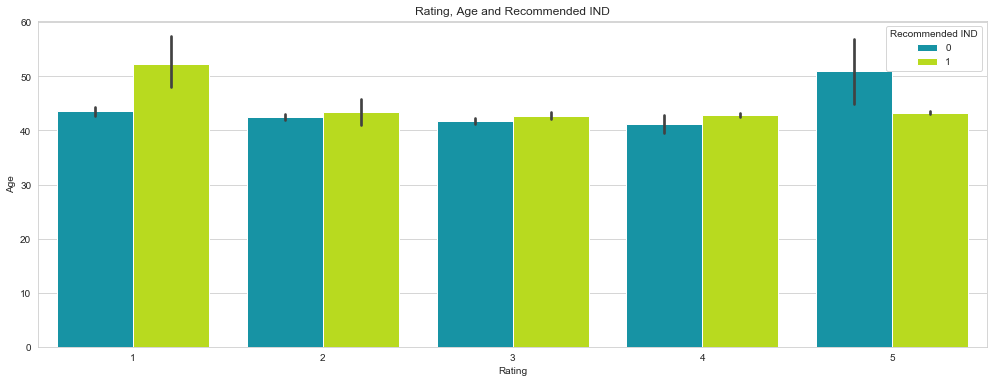

In [58]:
fig,ax = plt.subplots(figsize = (17,6))
tes = sns.barplot(data=data, x='Rating', y='Age', hue='Recommended IND', palette='nipy_spectral')
tes.set_title('Rating, Age and Recommended IND')
# ax.legend(labels={1:'green', 0:'blue'})

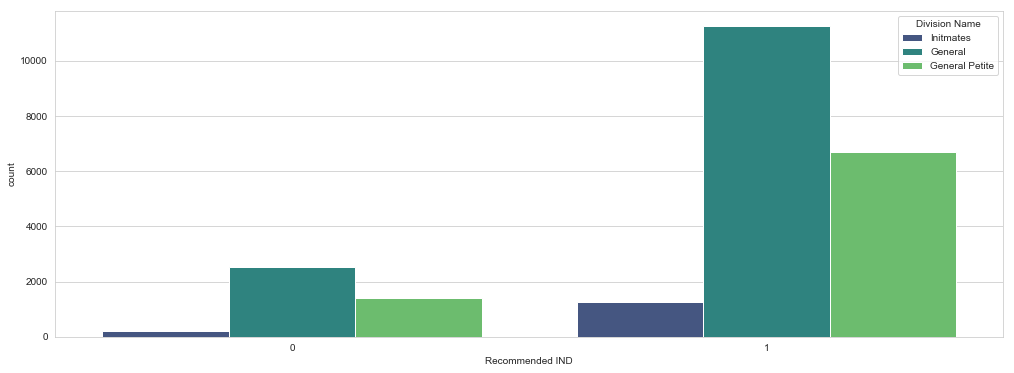

In [59]:
fig,ax = plt.subplots(figsize = (17,6))
sns.set_style('whitegrid')
sns.countplot(x='Recommended IND',hue='Division Name',data=data,palette='viridis', ax=ax)

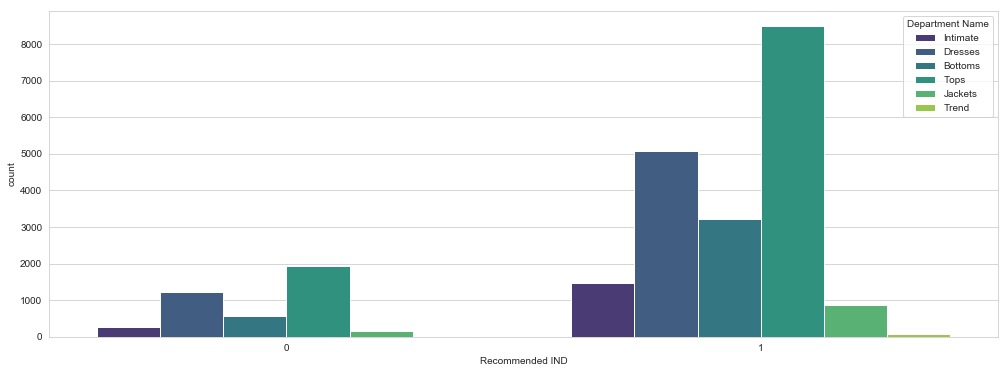

In [60]:
fig,ax = plt.subplots(figsize = (17,6))
sns.set_style('whitegrid')
sns.countplot(x='Recommended IND',hue='Department Name',data=data,palette='viridis', ax=ax)

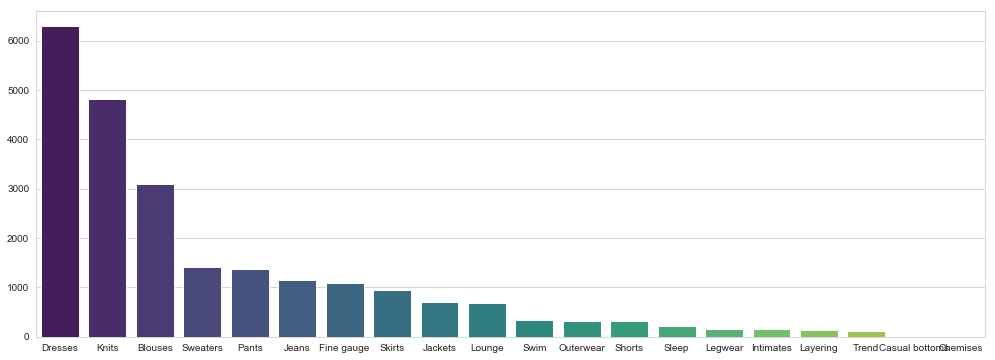

In [61]:
fig,ax = plt.subplots(figsize = (17,6))
sns.barplot(x=data['Class Name'].value_counts().index, y=data['Class Name'].value_counts().values, palette='viridis', ax=ax)

- to see the age of the reviewer by rating, and see if they would recommend the product or not

- Correlation between the columns:

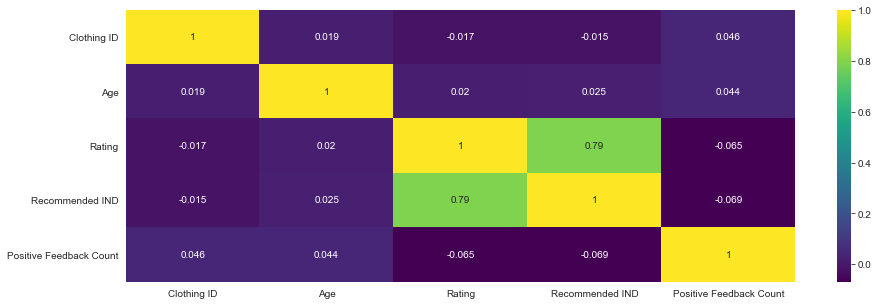

In [62]:
fig,ax=plt.subplots(figsize=(15,5))
sns.heatmap(data.corr(), annot=True, cmap='viridis', ax=ax)

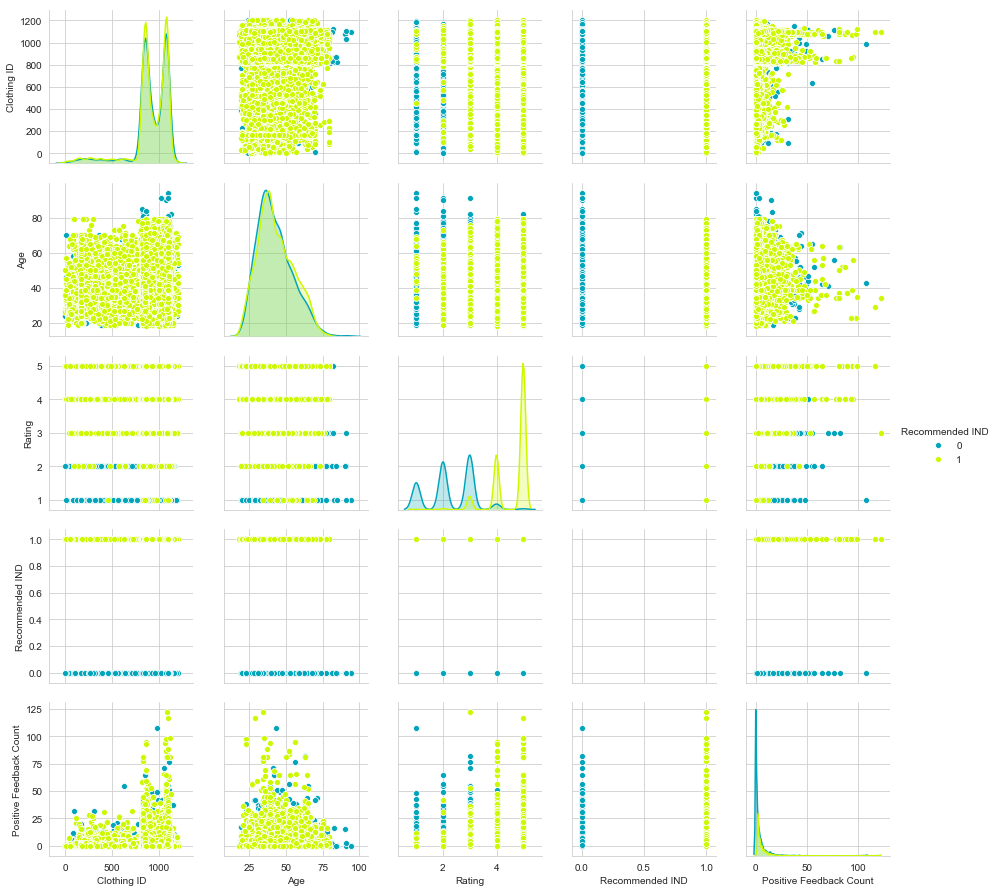

In [63]:
sns.pairplot(data, hue='Recommended IND', palette='nipy_spectral')

#### as it is show that the orange color (recomended value) is dominan for the blue color (not recommended value). the thing is data need to be balanced and normalize to get good distribution data of our targer

In [65]:
data['Recommended IND'].value_counts(normalize=True)

1    0.821526
0    0.178474
Name: Recommended IND, dtype: float64

In [66]:
data['Recommended IND'].value_counts()

1    19204
0     4172
Name: Recommended IND, dtype: int64

#### notes: the data target is imbalanced, it needs to be using sampling to get the balanced target

### Export CSV Clean

In [67]:
#data.to_csv('womens-clothing-clean-2.csv')